In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ast

In [41]:
image = cv2.imread("Snap_Speed3_0_5.jpg")
cpy = image.copy()


[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0 255 255]]


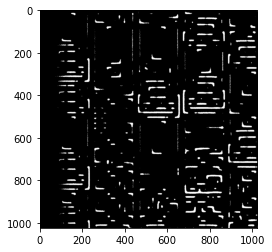

In [10]:
lower = [240, 240, 240]
upper = [255, 255, 255]

# create NumPy arrays from the boundaries
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")
# find the colors within the specified boundaries and apply
# the mask
mask = cv2.inRange(image, lower, upper)
output = cv2.bitwise_and(image, image, mask = mask)
# show the images
plt.imshow(np.hstack([image, output]))

done


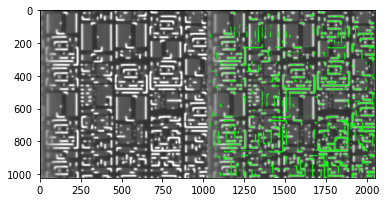

In [43]:
#test = cv2.fillPoly(img, np.int32([mask]), (0, 255, 0))

points = []
height, width = mask.shape
for x in range(height):
    for y in range(width):
        if(mask[x][y] == 255):
            points.append((y, x))
#         pixel = (mask[x, y][0], mask[x, y][1], mask[x, y][2])
#         if(pixel == (255, 255, 255)):
#             print("hello")

points = np.array(points, dtype=object)

for shape in points:
    #print(shape)
    shape = shape.reshape(-1,1,2)
    cv2.fillPoly(cpy, np.int32([shape]), color=(0, 255, 0))

print("done")
plt.imshow(np.hstack([image, cpy]))

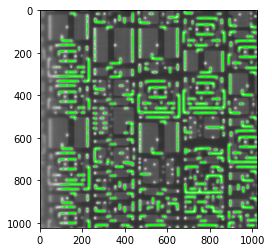

In [15]:
contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
drawn = cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(drawn)

In [21]:
height, width, _ = drawn.shape

for x in range(height):
    for y in range(width):
        #print(drawn[x, y])
        pixel = (drawn[x, y][0], drawn[x, y][1], drawn[x, y][2])
        if(pixel == (255, 255, 255)):
            drawn[x, y] = [0,255, 0]
            
print("finished")

finished


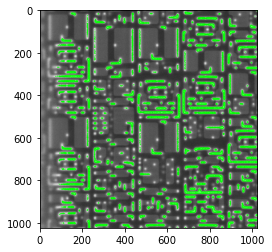

In [22]:
plt.imshow(drawn)

In [ ]:
def contour_identifier(img, output_color, lower, upper):
    image = cv2.imread(img)
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
    
    mask = cv2.inRange(image, lower, upper)
    contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    drawn = cv2.drawContours(img, contours, -1, output_color, 3)
    
    return drawn